<a href="https://colab.research.google.com/github/DianaSuprun/winstars-test/blob/main/EDA%20-%20Airbus%20Ship%20Detection%20Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airbus Ship Detection - EDA**

In [ ]:
import os
import random
import math

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from skimage.io import imread

1. Created all needed variables


In [ ]:
TRAIN_FOLDER = "/content/drive/MyDrive/тестові/winstars/train"
TEST_FOLDER = "/content/drive/MyDrive/тестові/winstars/test"
CSV_PATH = "/content/drive/MyDrive/тестові/winstars/train_ship_segmentations_v2.csv"

IMG_SIZE = (768, 768, 3)
NUM_CLASSES = 2
BATCH_SIZE = 8
MAX_TRAIN_STEPS = 100
VALIDATION_SPLIT = 0.2
NB_EPOCHS = 5
RANDOM_STATE = 42
VAL_IMAGES = 500

In [ ]:
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle_decode(mask_rle, shape=(768, 768)):
    '''
    Convert run-length encoded mask to a binary mask

    Args:
        mask_rle (str): Run-length encoded mask string
        shape (tuple): Shape of the output binary mask

    Returns:
        numpy.ndarray: Binary mask array
    '''
    # Split the run-length encoded string
    s = mask_rle.split()
    starts = np.asarray(s[0:][::2], dtype=int) - 1
    lengths = np.asarray(s[1:][::2], dtype=int)
    ends = starts + lengths

    # Initialize an array for the binary mask
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)

    # Set the pixels corresponding to the mask region to 1
    for start, end in zip(starts, ends):
        img[start:end] = 1

    # Reshape the array to the desired shape
    return img.reshape(shape).T

In [ ]:
def view_random_image(target_dir):
    '''
    View a random image from the specified directory

    Args:
        target_dir (str): Path to the directory containing images

    Returns:
        numpy.ndarray: Image array
    '''
    # Get a random image path
    random_image = random.sample(os.listdir(target_dir), 1)

    # Read in the image and plot it
    img = mpimg.imread(target_dir + "/" + random_image[0])
    plt.imshow(img)
    plt.axis("off")

    # Print the shape of the image
    print(f"Image shape: {img.shape}")

    return img

2. Count images

In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/тестові/winstars"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 2 images in '/content/drive/MyDrive/тестові/winstars'.
There are 0 directories and 24 images in '/content/drive/MyDrive/тестові/winstars/test'.
There are 0 directories and 66 images in '/content/drive/MyDrive/тестові/winstars/train'.


3.Looked through all data set

In [ ]:
df = pd.read_csv(CSV_PATH)
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


4.Observed single image

Image shape: (768, 768, 3)


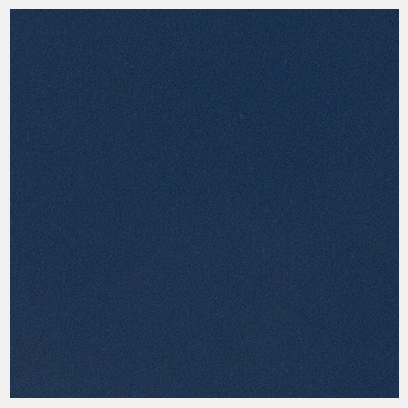

In [ ]:
img = view_random_image(TRAIN_FOLDER)

5. Found out a number of unique images

In [ ]:
num_images = len(df['ImageId'].unique())
print(f"The number of images in the dataset: {num_images}")

The number of images in the dataset: 192556


6. Numbers of ships and no-ships images

In [ ]:
num_ships = len(df[df['EncodedPixels'].notna()])
num_non_ships = num_images - num_ships
print('Number of ships:', num_ships)
print('Number of non-ships:', num_non_ships)

Number of ships: 81723
Number of non-ships: 110833


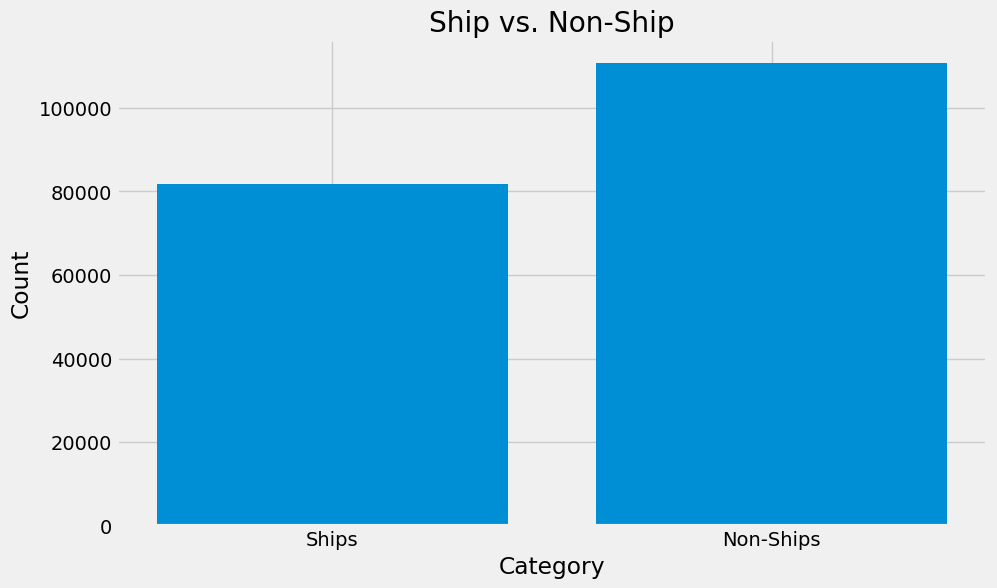

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['Ships', 'Non-Ships'], [num_ships, num_non_ships])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Ship vs. Non-Ship')
plt.show()

7. Distribution of the ships

In [ ]:
number_of_masks_counts = df["ImageId"].value_counts()
number_of_masks_counts

e6fd0c12e.jpg    15
2053a78bd.jpg    15
d3c47b3d3.jpg    15
4de149bd9.jpg    15
c8e722430.jpg    15
                 ..
591ab2331.jpg     1
591af2fb2.jpg     1
591afc23d.jpg     1
591b2dd30.jpg     1
ffffe97f3.jpg     1
Name: ImageId, Length: 192556, dtype: int64

In [ ]:
print(df.columns)

Index(['ImageId', 'EncodedPixels'], dtype='object')


In [ ]:
ship_df = df.copy()
ship_df['NumberOfShips'] = ship_df['EncodedPixels'].notnull().astype(int)
ship_df['EncodedPixels'] = ship_df['EncodedPixels'].replace(0, '')
ship_df

,ImageId,EncodedPixels,NumberOfShips
0,00003e153.jpg,NaN,0
1,0001124c7.jpg,NaN,0
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,1
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,1
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...,1
...,...,...,...
231718,fffedbb6b.jpg,NaN,0
231719,ffff2aa57.jpg,NaN,0
231720,ffff6e525.jpg,NaN,0
231721,ffffc50b4.jpg,NaN,0


In [ ]:
print(ship_df.columns)

Index(['ImageId', 'EncodedPixels', 'NumberOfShips'], dtype='object')


In [ ]:
ship_df = ship_df.groupby('ImageId').agg({'EncodedPixels': 'first', 'NumberOfShips': 'sum'}).reset_index()
ship_df["EncodedPixels"] = ship_df["EncodedPixels"].apply(lambda x: x if x != 0 else "")
# ship_df = ship_df.groupby('ImageId').sum().reset_index()
# ship_df["EncodedPixels"] = ship_df["EncodedPixels"].apply(lambda x: x if x != 0 else "")
# ship_df

In [ ]:
ship_df

,ImageId,EncodedPixels,NumberOfShips
0,00003e153.jpg,None,0
1,0001124c7.jpg,None,0
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,1
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,5
4,0001b1832.jpg,None,0
...,...,...,...
192551,fffedbb6b.jpg,None,0
192552,ffff2aa57.jpg,None,0
192553,ffff6e525.jpg,None,0
192554,ffffc50b4.jpg,None,0


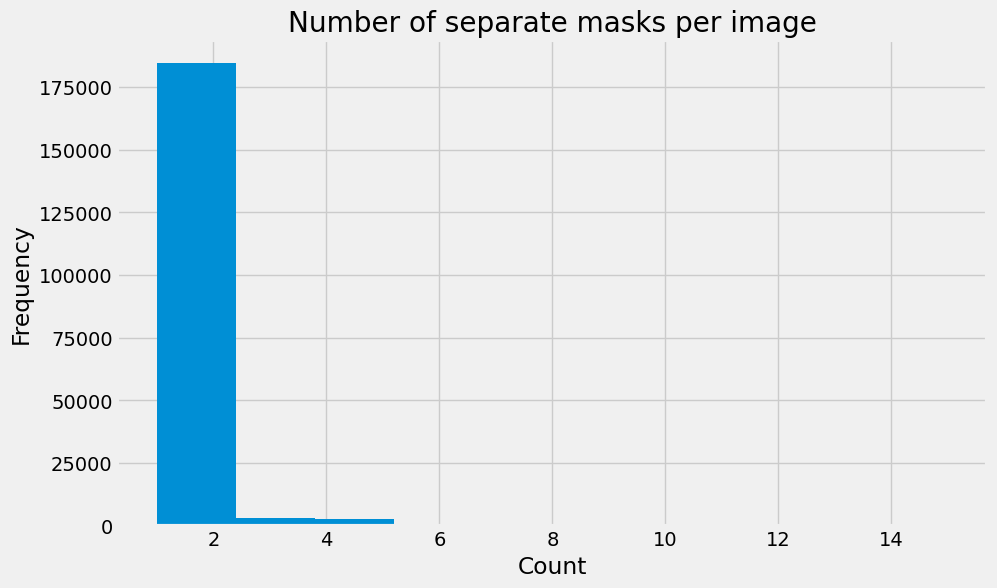

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(number_of_masks_counts, bins=10)  # Create a histogram with 30 bins
plt.title("Number of separate masks per image")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

8.Dealing with Nans

In [ ]:
rle_with_zeros = rle_encode(np.zeros((768, 768, 1)))
print(rle_with_zeros == "")

True


In [ ]:
df = df.fillna("")
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,
1,0001124c7.jpg,
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


9.Made dataset more balanced

<Axes: ylabel='Frequency'>

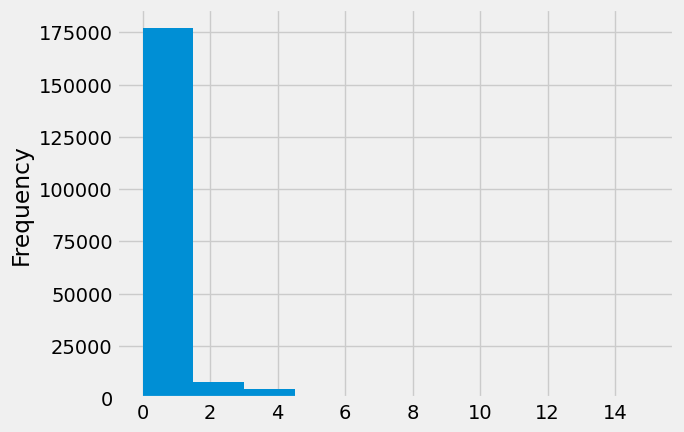

In [ ]:
ship_df['NumberOfShips'].plot.hist()

In [ ]:
ship_df['NumberOfShips'].value_counts()

0     150000
1      27104
2       7674
3       2954
4       1622
5        925
6        657
7        406
8        318
9        243
10       168
11       144
12       124
14        76
13        75
15        66
Name: NumberOfShips, dtype: int64

In [ ]:
def undersample_zeros(df):
    zeros = df[df['NumberOfShips'] == 0].sample(n=25_000, random_state = RANDOM_STATE)
    nonzeros = df[df['NumberOfShips'] != 0]
    return pd.concat((nonzeros, zeros))

In [ ]:
train_ships, valid_ships = train_test_split(ship_df,
                 test_size = 0.3,
                 stratify = ship_df['NumberOfShips'])

In [ ]:
train_ships = undersample_zeros(train_ships)
valid_ships = undersample_zeros(valid_ships)
train_ships['NumberOfShips'].plot.hist(bins=np.arange(10))

In [ ]:
(train_ships['NumberOfShips'] > 0).astype(int).value_counts().plot.bar()

In [ ]:
(valid_ships['NumberOfShips'] > 0).astype(int).value_counts().plot.bar()